## TSF GRIP TASK-3

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [16]:
data=pd.read_csv('C:/Users/Rohan Sharma/Desktop/SampleSuperstore.csv')

In [17]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [9]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [18]:
data.isnull().values.any()

False

In [19]:
data.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


In [20]:
data.shape

(9994, 13)

### Calculating the Inter Quartile Range

In [21]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Postal Code    66785.00000
Sales            192.66000
Quantity           3.00000
Discount           0.20000
Profit            27.63525
dtype: float64


### Total Consumption in US in various Sectors

Text(0.5, 0.98, 'Consumption in United States')

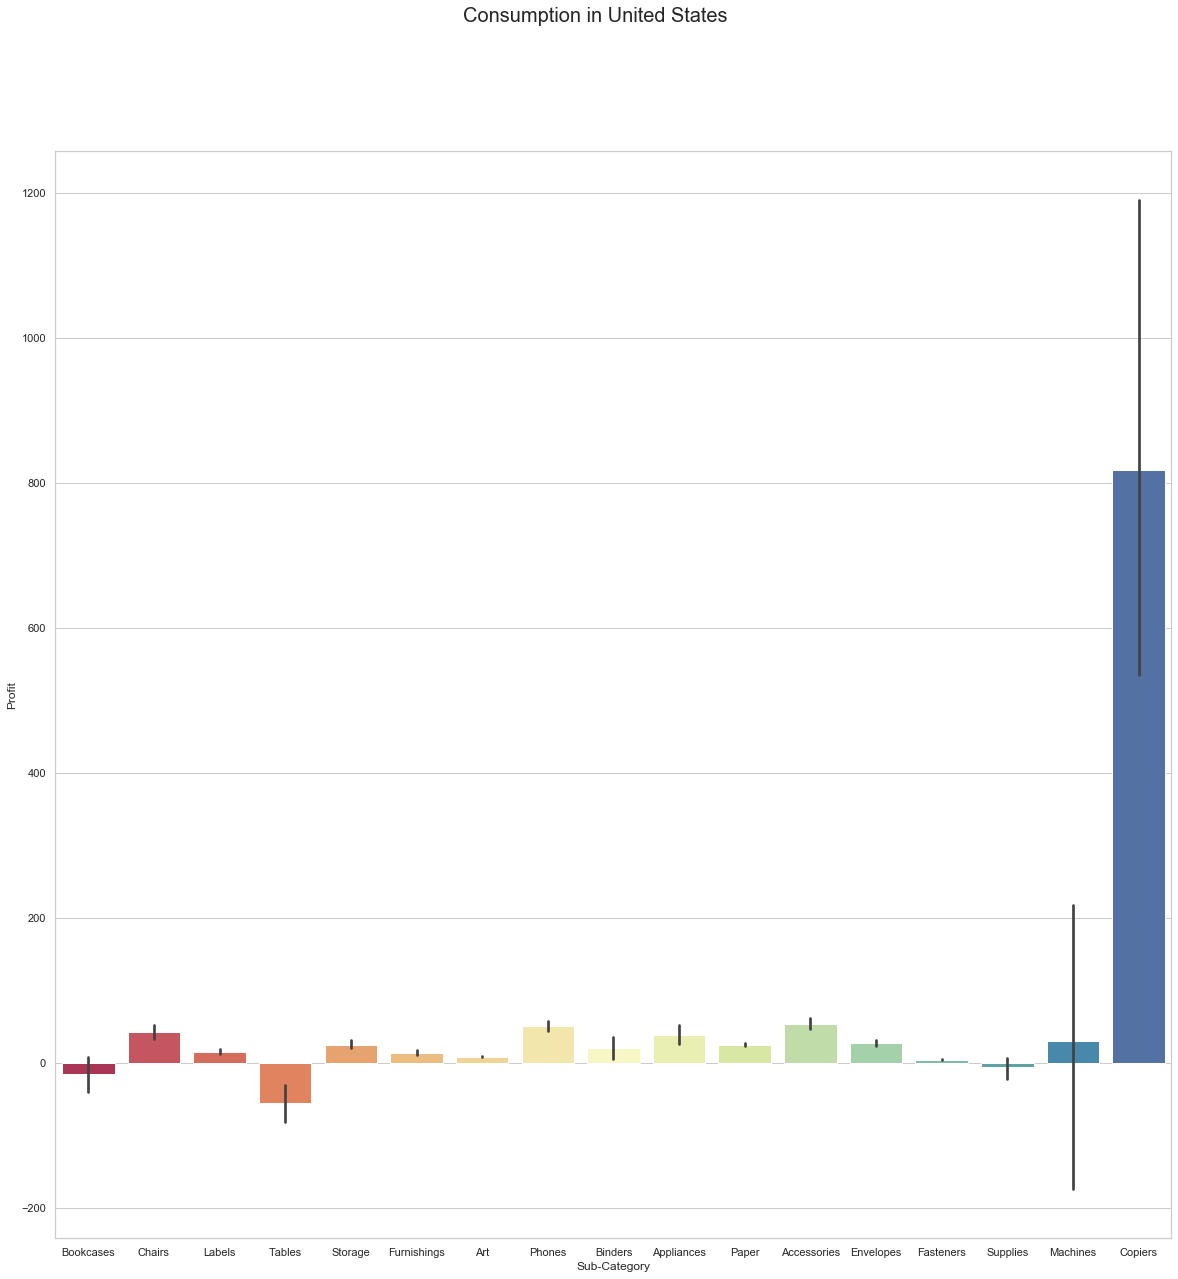

In [22]:
sns.set(style="whitegrid")
plt.figure(2, figsize=(20,20))
sns.barplot(x='Sub-Category',y='Profit', data=data, palette='Spectral')
plt.suptitle('Consumption in United States', fontsize=20)

In [23]:
Top_Sales = data.groupby("State").Sales.sum().nlargest(n =50)
Top_Profit =data.groupby("State").Profit.sum().nlargest(n = 50)

### Total Sales in different States in US in Descending Order

In [24]:
Top_Sales.index

Index(['California', 'New York', 'Texas', 'Washington', 'Pennsylvania',
       'Florida', 'Illinois', 'Ohio', 'Michigan', 'Virginia', 'North Carolina',
       'Indiana', 'Georgia', 'Kentucky', 'New Jersey', 'Arizona', 'Wisconsin',
       'Colorado', 'Tennessee', 'Minnesota', 'Massachusetts', 'Delaware',
       'Maryland', 'Rhode Island', 'Missouri', 'Oklahoma', 'Alabama', 'Oregon',
       'Nevada', 'Connecticut', 'Arkansas', 'Utah', 'Mississippi', 'Louisiana',
       'Vermont', 'South Carolina', 'Nebraska', 'New Hampshire', 'Montana',
       'New Mexico', 'Iowa', 'Idaho', 'Kansas', 'District of Columbia',
       'Wyoming', 'South Dakota', 'Maine', 'West Virginia', 'North Dakota'],
      dtype='object', name='State')

### Total Profits in different States in US in Descending Order

In [25]:
Top_Profit.index

Index(['California', 'New York', 'Washington', 'Michigan', 'Virginia',
       'Indiana', 'Georgia', 'Kentucky', 'Minnesota', 'Delaware', 'New Jersey',
       'Wisconsin', 'Rhode Island', 'Maryland', 'Massachusetts', 'Missouri',
       'Alabama', 'Oklahoma', 'Arkansas', 'Connecticut', 'Nevada',
       'Mississippi', 'Utah', 'Vermont', 'Louisiana', 'Nebraska', 'Montana',
       'South Carolina', 'New Hampshire', 'Iowa', 'New Mexico',
       'District of Columbia', 'Kansas', 'Idaho', 'Maine', 'South Dakota',
       'North Dakota', 'West Virginia', 'Wyoming', 'Oregon', 'Florida',
       'Arizona', 'Tennessee', 'Colorado', 'North Carolina', 'Illinois',
       'Pennsylvania', 'Ohio', 'Texas'],
      dtype='object', name='State')

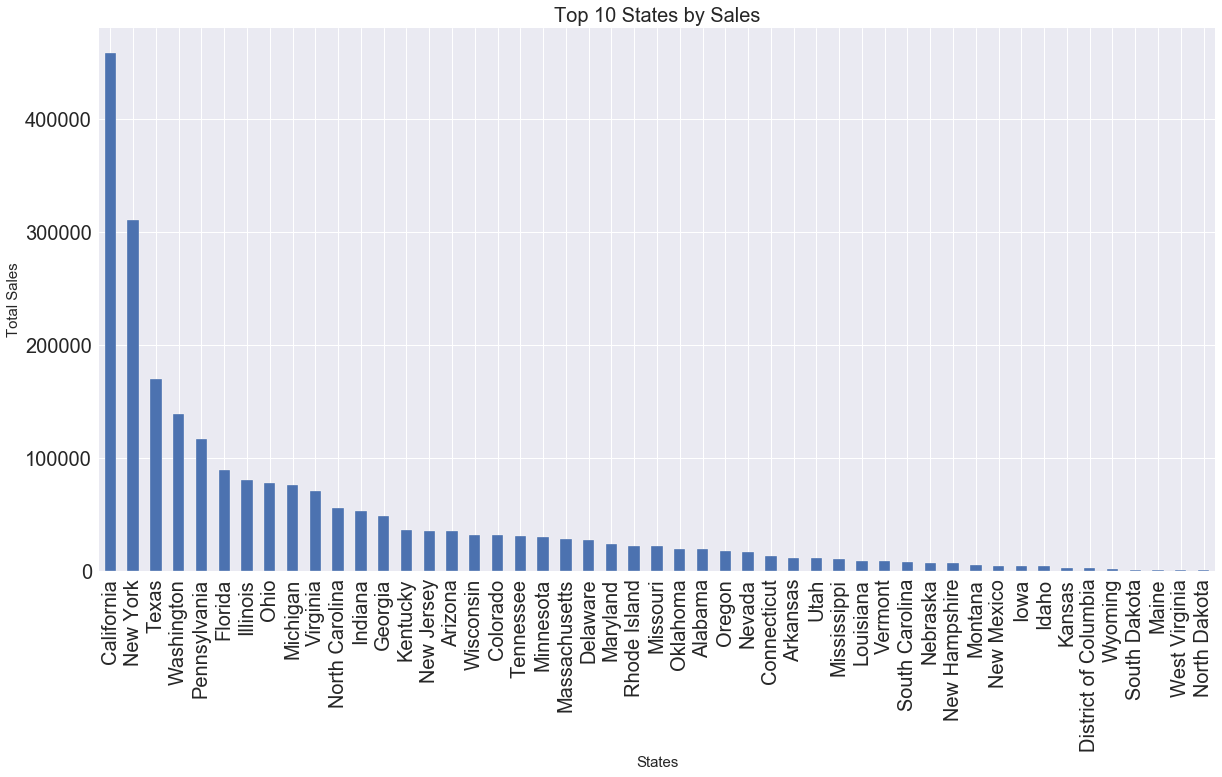

In [26]:
plt.style.use('seaborn')
Top_Sales.plot(kind ='bar', figsize =(20,10), fontsize =20)
plt.xlabel("States", fontsize =15)
plt.ylabel("Total Sales",fontsize =15)
plt.title("Top 10 States by Sales",fontsize =20)
plt.show()

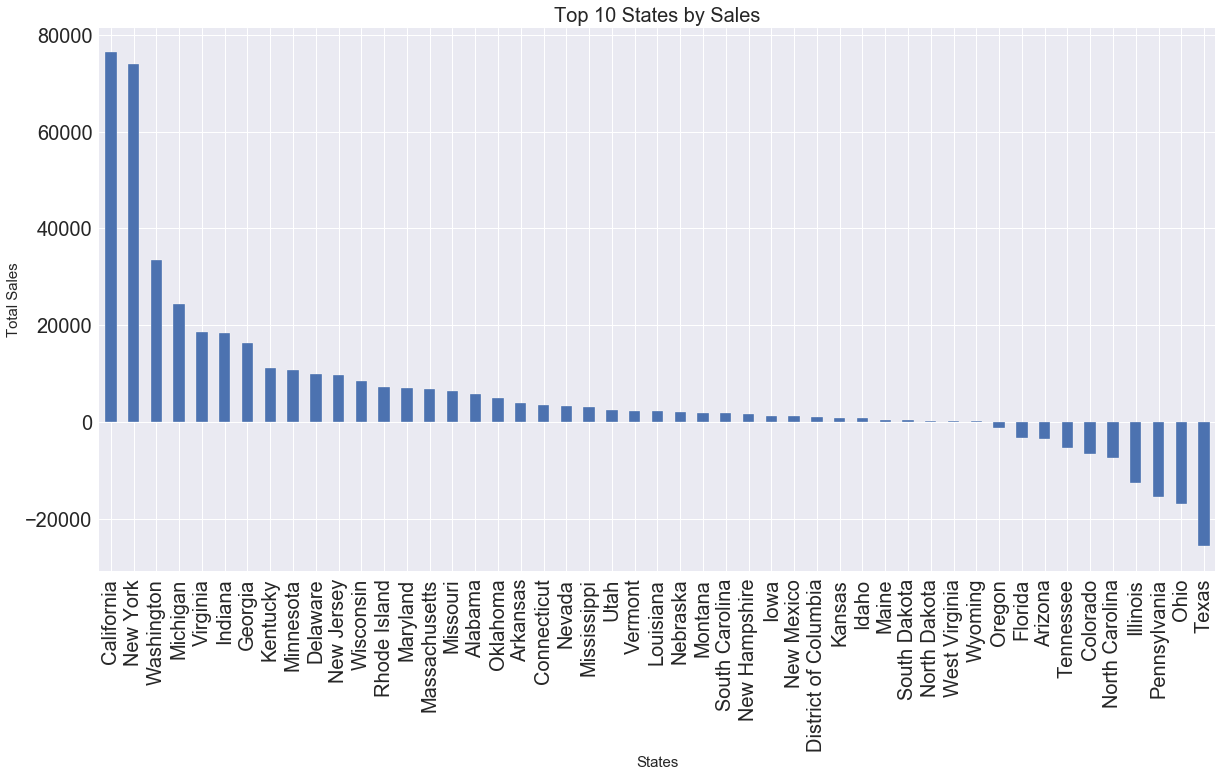

In [27]:
plt.style.use('seaborn')
Top_Profit.plot(kind ='bar', figsize =(20,10), fontsize =20)
plt.xlabel("States", fontsize =15)
plt.ylabel("Total Sales",fontsize =15)
plt.title("Top 10 States by Sales",fontsize =20)
plt.show()

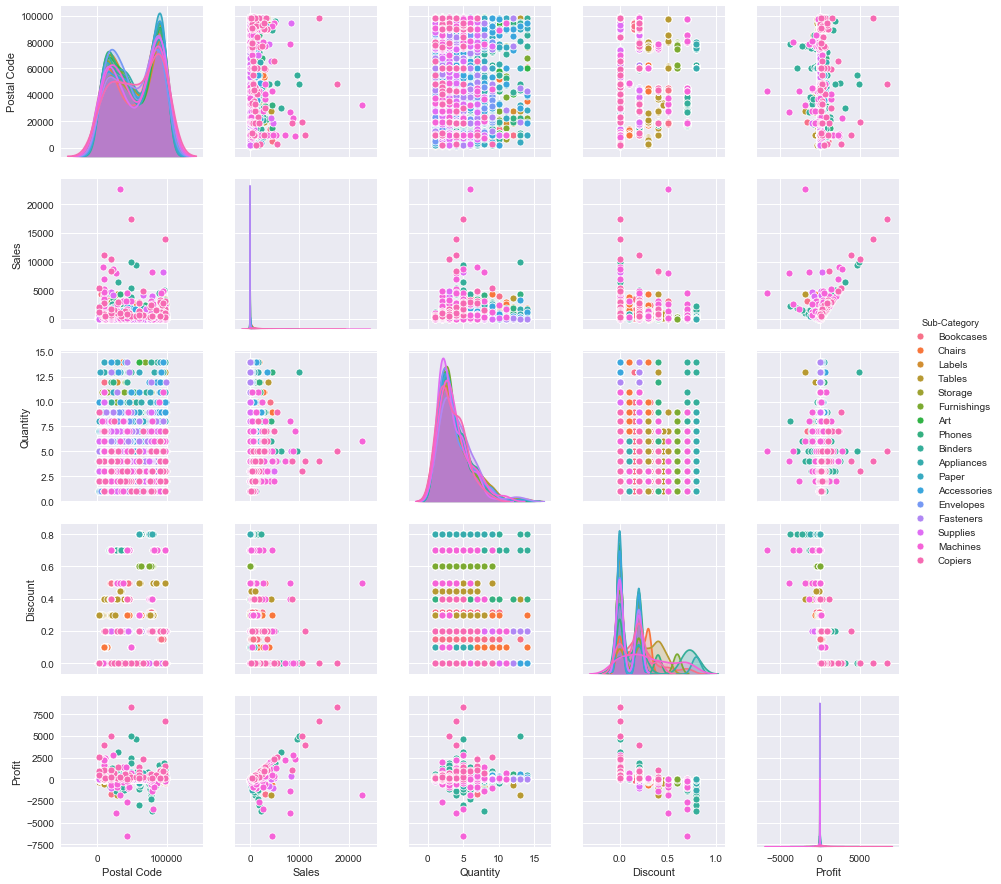

In [30]:
figsize=(10,10)
sns.pairplot(data,hue='Sub-Category')

### Heat Map for different Categories

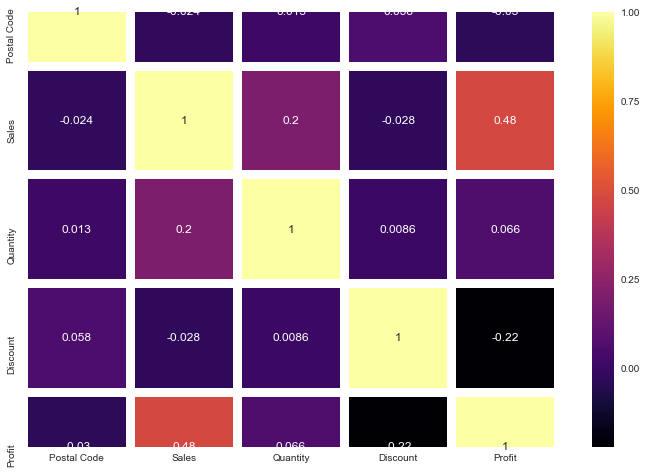

In [34]:
f,ax = plt.subplots(figsize=(12, 8))
sns.heatmap(data.corr(),annot=True,cmap='inferno',lw=8,linecolor='white')

### Category VS Profit

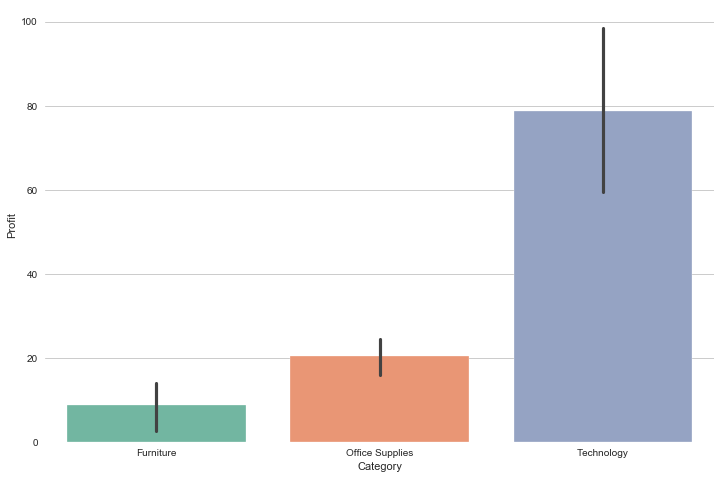

In [41]:
plt.figure(figsize=[12,8])
ax = sns.barplot(x="Category", y="Profit", data=data, palette="Set2")

### Category VS Profit in Different Regions in US

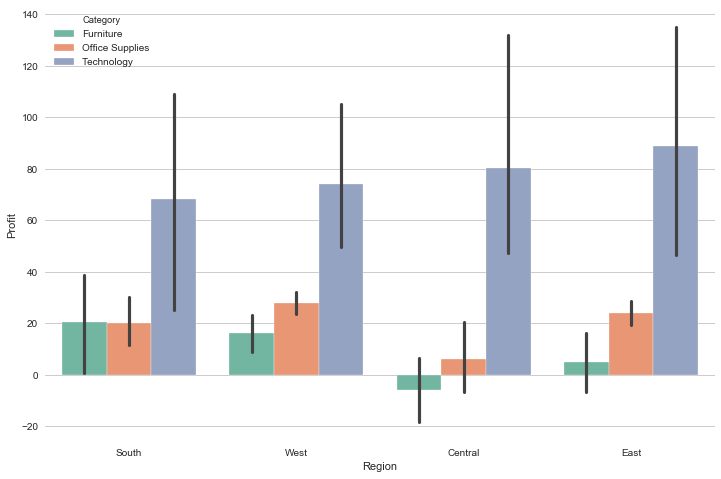

In [42]:
plt.figure(figsize=[12,8])
ax = sns.barplot(x="Region", y="Profit", hue="Category", data=data, palette="Set2")

### Subcategory VS Profit

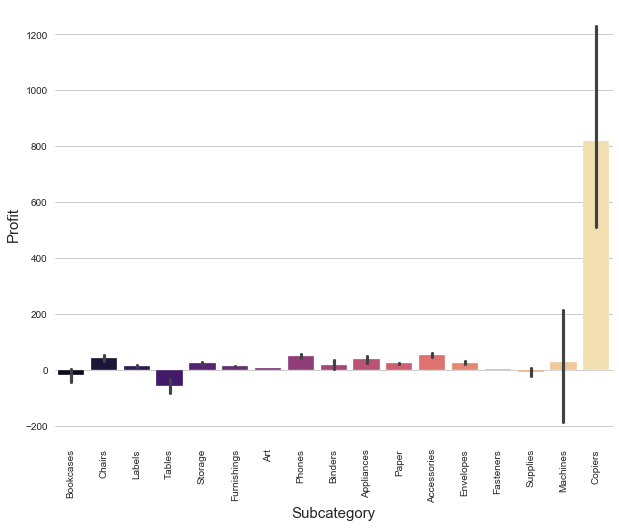

In [43]:
plt.figure(figsize=[10,8])
ax = sns.barplot(x="Sub-Category", y="Profit", data=data, palette="magma")
plt.xlabel("Subcategory", fontsize=15)
plt.ylabel("Profit",fontsize=15)
plt.xticks(rotation=90)
plt.show()

### Subcategory VS Sales

Text(0, 0.5, 'Sales')

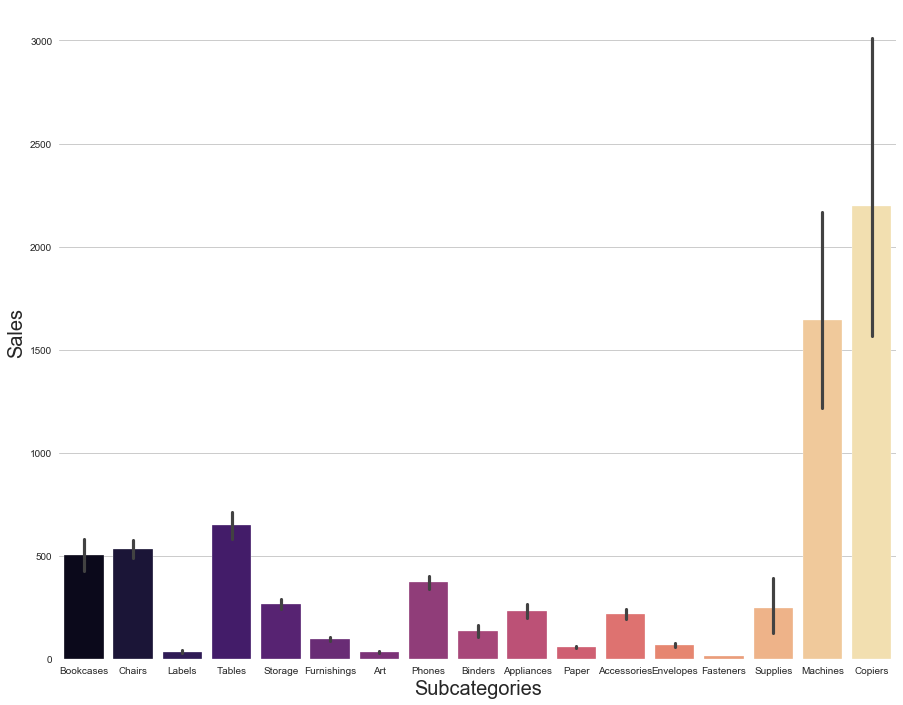

In [49]:
plt.figure(figsize=[15,12])
ax = sns.barplot(x="Sub-Category", y="Sales", data=data, palette="magma")
plt.xlabel("Subcategories",fontsize=20)
plt.ylabel("Sales",fontsize=20)

Text(0, 0.5, 'Profit')

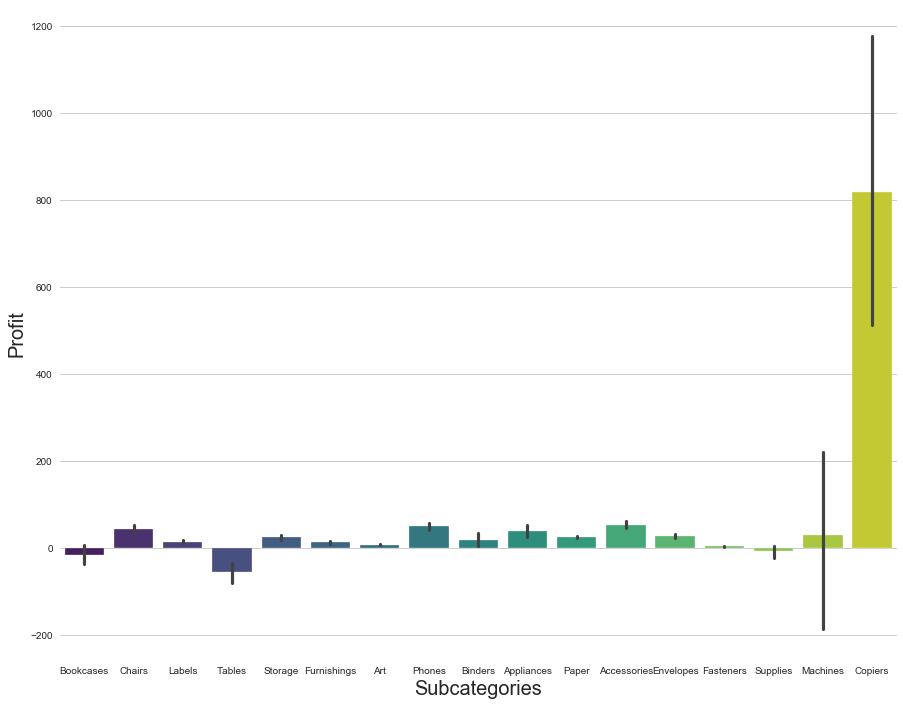

In [48]:
plt.figure(figsize=[15,12])
ax = sns.barplot(x="Sub-Category", y="Profit", data=data, palette="viridis")
plt.xlabel("Subcategories",fontsize=20)
plt.ylabel("Profit",fontsize=20)